In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pickle

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('heart.csv')

### Univariate Analysis


In [4]:
def plot_histograms(df, columns):
    df[columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
    plt.suptitle("Histograms of Numerical Features")
    plt.show()

In [5]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

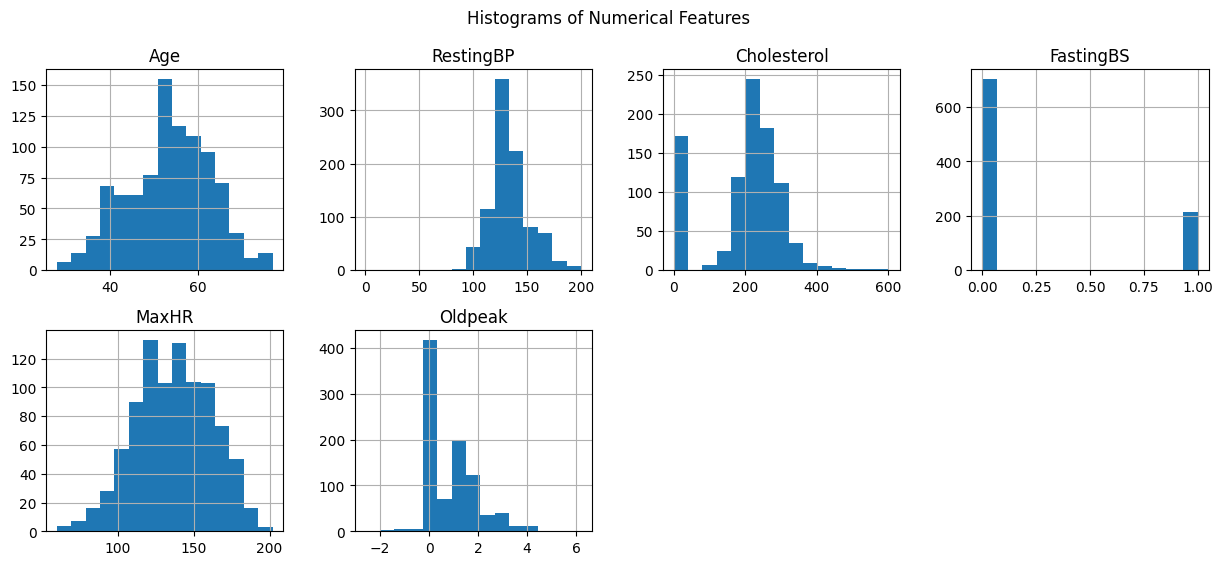

In [6]:
plot_histograms(df, numerical_columns)

In [7]:
def plot_boxplots(df, columns):
    df[columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 6))
    plt.suptitle("Boxplots of Numerical Features")
    plt.show()

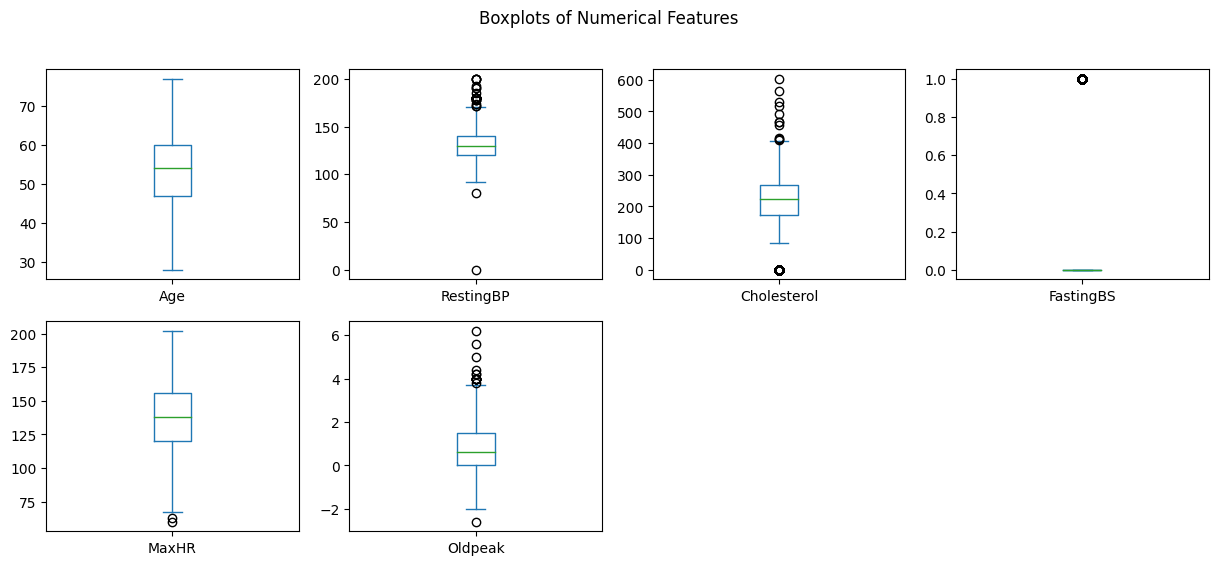

In [8]:
plot_boxplots(df, numerical_columns)

In [9]:
def plot_bar_charts(df, columns):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, col in enumerate(columns):
        sns.countplot(x=col, data=df, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f"Count of {col}")
    plt.tight_layout()
    plt.suptitle("Bar Charts of Categorical Features", y=1.02)
    plt.show()

In [11]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

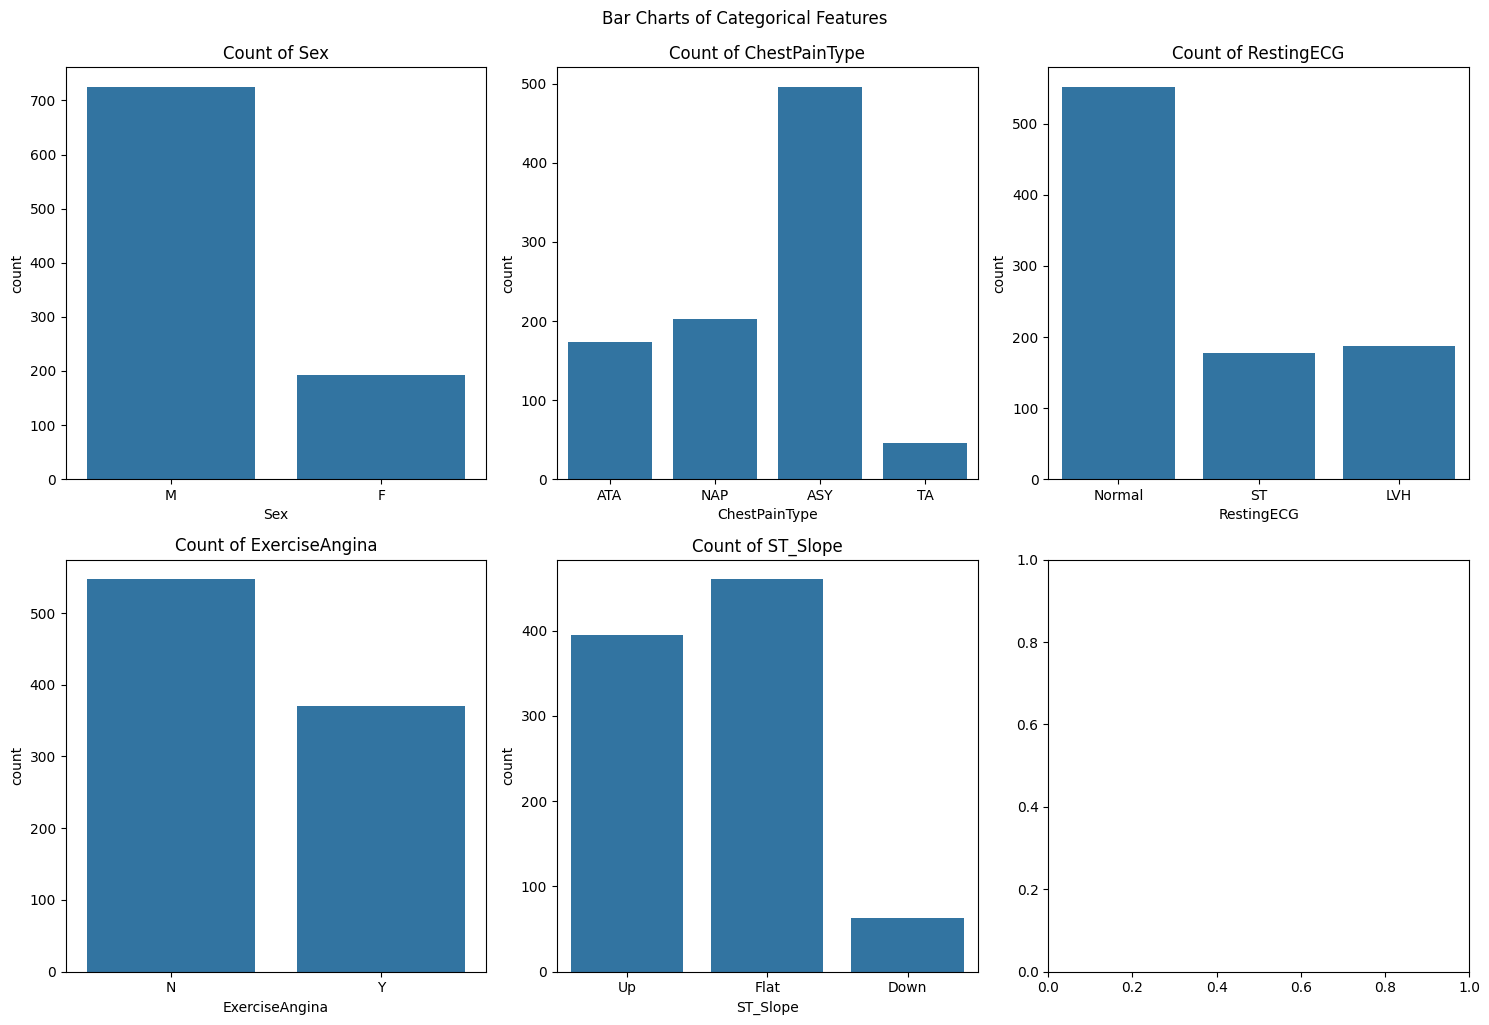

In [12]:
plot_bar_charts(df, categorical_columns)

In [13]:
print("Summary Statistics for Numerical Features:\n")
print(df[numerical_columns].describe())

Summary Statistics for Numerical Features:

              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000


## Bivariate Analysis

In [14]:
def plot_correlation_matrix(df, columns):
    corr_matrix = df[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()

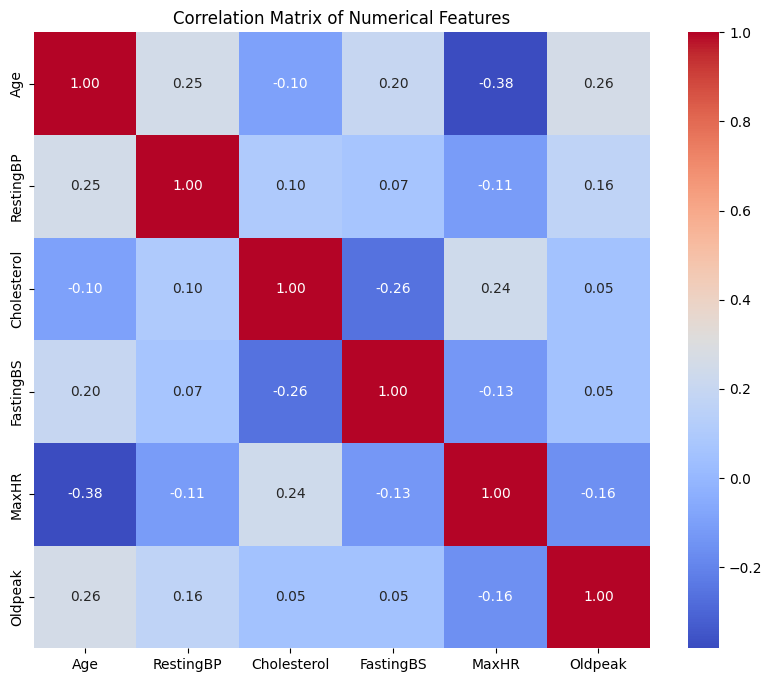

In [15]:
plot_correlation_matrix(df, numerical_columns)


In [16]:
def plot_scatter_plots(df, columns, target):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, col in enumerate(columns):
        sns.scatterplot(x=col, y=target, data=df, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f"{col} vs {target}")
    plt.tight_layout()
    plt.suptitle(f"Scatter Plots of Numerical Features vs {target}", y=1.02)
    plt.show()

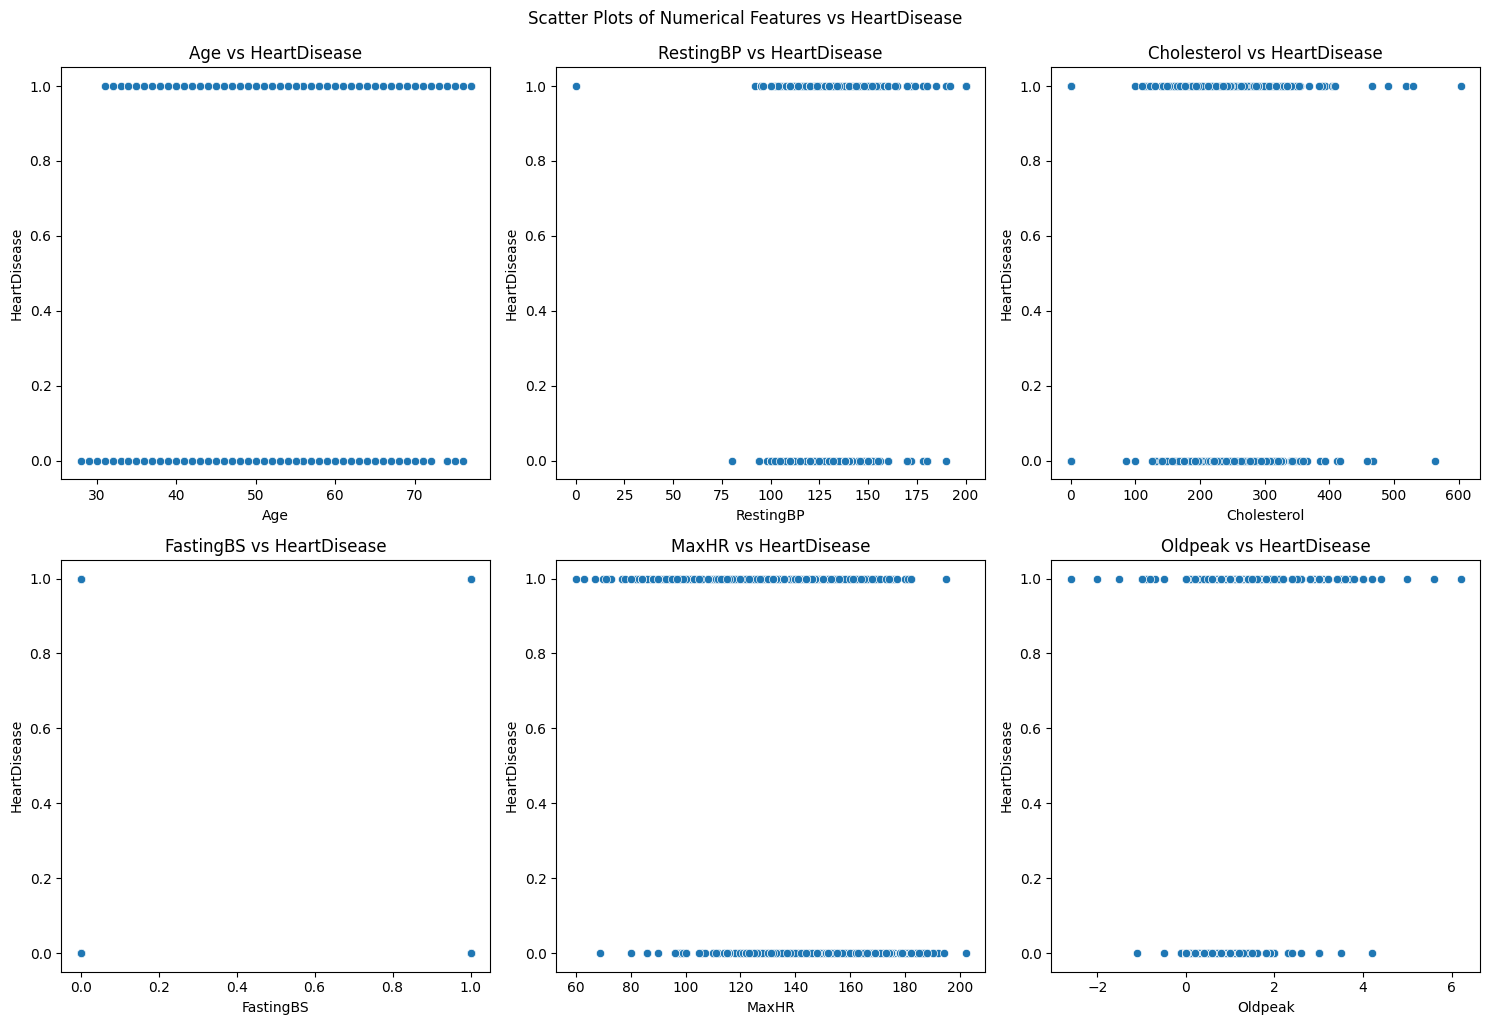

In [17]:
plot_scatter_plots(df, numerical_columns, 'HeartDisease')


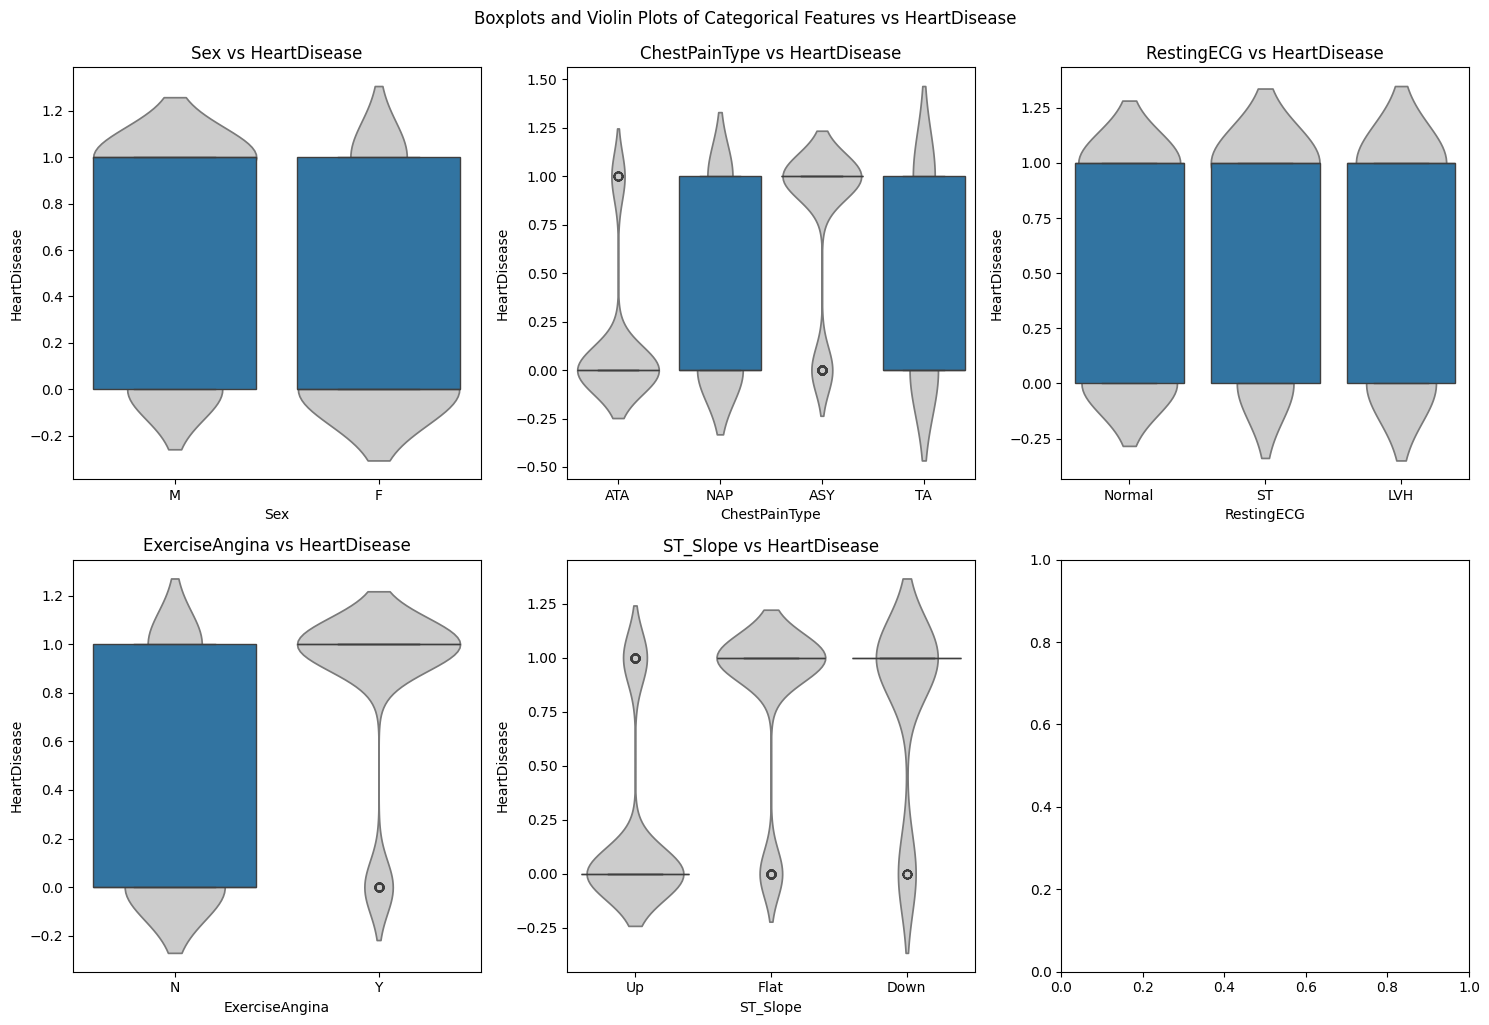

In [18]:
def plot_categorical_vs_target(df, columns, target):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, col in enumerate(columns):
        sns.boxplot(x=col, y=target, data=df, ax=axes[i//3, i%3])
        sns.violinplot(x=col, y=target, data=df, ax=axes[i//3, i%3], inner=None, color="0.8")
        axes[i//3, i%3].set_title(f"{col} vs {target}")
    plt.tight_layout()
    plt.suptitle(f"Boxplots and Violin Plots of Categorical Features vs {target}", y=1.02)
    plt.show()

plot_categorical_vs_target(df, categorical_columns, 'HeartDisease')

In [22]:
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)

    # using OneHotEncoder
    categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument name
    encoded_categorical_data = encoder.fit_transform(df[categorical_columns])

    # Convert to a DataFrame
    encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))


    df_encoded = df.drop(columns=categorical_columns).join(encoded_df)


    X = df_encoded.drop(columns=['HeartDisease'])
    y = df_encoded['HeartDisease']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, encoder

In [27]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    feature_importance = rf_model.feature_importances_

    return rf_model, accuracy, precision, recall, f1, classification_rep, feature_importance

In [32]:
def save_model_and_encoder(model, encoder, model_filename='rf_model.pkl', encoder_filename='encoder.pkl'):
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    with open(encoder_filename, 'wb') as file:
        pickle.dump(encoder, file)


In [33]:
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf_model = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='f1')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    best_model = grid_search.best_estimator_

    return best_model, best_params

if __name__ == "__main__":
    file_path = 'heart.csv'

    X_train, X_test, y_train, y_test, encoder = load_and_preprocess_data(file_path)

    rf_model, accuracy, precision, recall, f1, classification_rep, feature_importance = train_and_evaluate_model(X_train, y_train, X_test, y_test)

    print(f"Initial Model Accuracy: {accuracy}")
    print(f"Initial Model Precision: {precision}")
    print(f"Initial Model Recall: {recall}")
    print(f"Initial Model F1 Score: {f1}")
    print("Initial Model Classification Report:\n", classification_rep)

    save_model_and_encoder(rf_model, encoder, model_filename='rf_model.pkl', encoder_filename='encoder.pkl')

    tuned_model, best_params = hyperparameter_tuning(X_train, y_train)

    y_pred_tuned = tuned_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    precision_tuned = precision_score(y_test, y_pred_tuned)
    recall_tuned = recall_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)

    print(f"Tuned Model Accuracy: {accuracy_tuned}")
    print(f"Tuned Model Precision: {precision_tuned}")
    print(f"Tuned Model Recall: {recall_tuned}")
    print(f"Tuned Model F1 Score: {f1_tuned}")


Initial Model Accuracy: 0.875
Initial Model Precision: 0.8962264150943396
Initial Model Recall: 0.8878504672897196
Initial Model F1 Score: 0.892018779342723
Initial Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Tuned Model Accuracy: 0.8695652173913043
Tuned Model Precision: 0.8878504672897196
Tuned Model Recall: 0.8878504672897196
Tuned Model F1 Score: 0.8878504672897196
